# 단순 선형 회귀

# < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

### 필요한 모듈 import

In [6]:
import numpy as np
#sklearn의 toy dataset import 
import pandas as pd
from sklearn.datasets import load_iris
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [9]:
import os 
print(os.getcwdb())

b'/Users/minholee/playdata/machinelearning'


# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [11]:
#온도와 맥주 
beer = pd.read_csv('data/02ml2/beer.csv')
type(beer)

pandas.core.frame.DataFrame

### 데이터 탐색
그림으로 많이 함

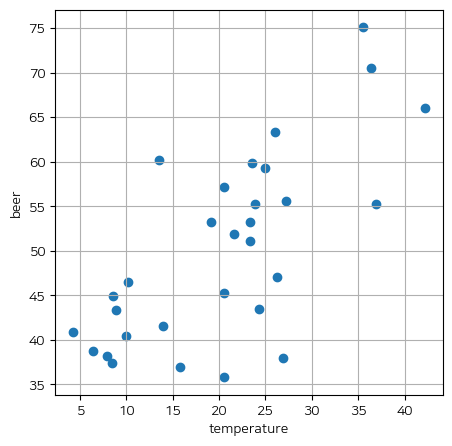

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(beer["temperature"], beer["beer"])
#plt.scatter(beer.temparature, beer.beer)
plt.xlabel("temperature")
plt.ylabel("beer")
plt.grid()

#기온이 32도일때 값이 얼마일까? 를 알아보자!

데이터 탐색 후 어떤 머신러닝 모델을 쓸 지 결정하기 

In [15]:
# 독립 변수, 종속 변수 확인
beer.temperature

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [18]:
# 종속 변수 확인, 레코드 수 확인
len(beer)
#len은 진짜 무지 중요함. 메모리 올리기 전에 

#여기까지가 EDA

30

###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [22]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
# 전부 다 학습에 쓰는게 좋은가? -> 이건 데이터 분석가가 결정할 문제, 교차 검증
# eda에서는 pd, np sklearn은 임포트 꼭 하셈
#독립변수, 종속변수 데이터셋 준비
#독립변수는 무조건 2차원으로 만들어야 함
X = np.array(beer["temperature"]).reshape((-1, 1))
y = np.array(beer.beer) #애는 1차원이어도 됨
y

array([45.3, 59.3, 40.4, 38. , 37. , 40.9, 60.2, 63.3, 51.1, 44.9, 47. ,
       53.2, 43.5, 53.2, 37.4, 59.9, 41.5, 75.1, 55.6, 57.2, 46.5, 35.8,
       51.9, 38.2, 66. , 55.3, 55.3, 43.3, 70.5, 38.8])

In [24]:
#학습용 검증용 데이터셋 분리 
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #이렇게 하면 4개의 데이터셋이 나옴

In [26]:
len(X_train), len(X_test), len(y_train), len(y_test)
# 드

(24, 6, 24, 6)

### 모델 구축

In [27]:
#모델 클래스 선택 후 인스턴스 객체 생성

lr = LinearRegression()

In [28]:
# 학습 수행
# 데이터를 넣어서 맞는 것 찾는 메소드 
reg = lr.fit(X_train, y_train)
#minmaxscaling 할거면 true옵션 주면 됨

In [29]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
w1 = reg.coef_[0] #계수 (array에 들어있음) w1

array([0.69705648])

In [30]:
w0 = reg.intercept_ #절편 

36.06666541566105

In [35]:
#회귀식
print(f"y = {reg.coef_[0]}x + {reg.intercept_}")
print("y = {:2f}x + {:.3f}".format(reg.coef_[0], reg.intercept_))

y = 0.697056480016629x + 36.06666541566105
y = 0.697056x + 36.067


In [46]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test)
y_pred

array([60.81217046, 50.35632326, 54.32954519, 50.35632326, 41.92193985,
       43.17664151])

In [37]:
y_test

array([75.1, 35.8, 47. , 57.2, 37.4, 46.5])

### 모델 성능 평가

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#MSE
mse = mean_squared_error(y_test, y_pred)
#RMSE
rmse = np.sqrt(mse)


In [44]:
#결정계수 R2
r2 = r2_score(y_test, y_pred)

In [45]:
print(f"MSE: {mse}")
print(f"RMSE: {rmse}") # 단위가 원래 단위로 돌아와서 좋은 거임 
print(f"R2: {r2}")

MSE: 91.34656925529704
RMSE: 9.557539916489862
R2: 0.48456481297951504


### 시각화

Text(0, 0.5, 'beer')

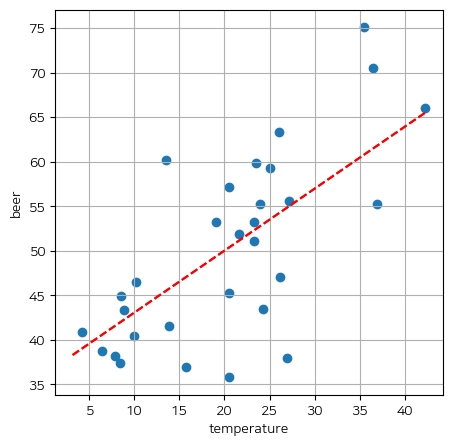

In [52]:
#y = 0.697056X + 36.06 시각화
plt.figure(figsize=(5,5))
plt.scatter(beer.temperature, beer.beer)
plt.grid()
# 직선을 그리는 방법 -> 점 두 개 있으면 그을 수 있음 
xx = np.arange(beer.temperature.min()-1, beer.temperature.max()+1) #원래 데이터셋보다 조금 작고 원래 데이터셋보다 조금 큰 점으로 직선 그리자 
yy = reg.predict(xx.reshape((len(xx), 1))) #머신러닝의 독립변수는 2차원, 그래서 2차원으로 만들어줌 
#reshape할 때엔 튜플로 넣어야 함

xx, yy
# 수집한 데이터셋 시각화
plt.plot(xx, yy, linestyle = '--', color = 'red')
plt.plot(xx, yy, ls = '--', c = 'red');
plt.xlabel('temperature')
plt.ylabel("beer")

#지금까지 한건 OLS(Ordinary Least Squares)

# 응용1. 나이, 키의 관계를 회귀 분석

In [53]:
# 필요한 모듈 import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 데이터 생성/수집

In [56]:
age_height = pd.read_csv("data/02ml2/age_height.csv")

In [58]:
age_height.columns

Index(['age(X)', 'height(T)'], dtype='object')

#### 데이터 탐색

Text(0, 0.5, '키')

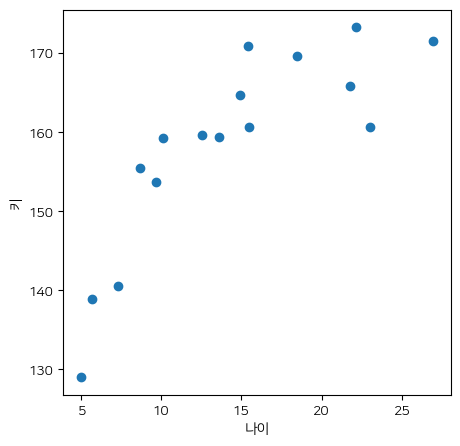

In [60]:
# 데이터 분포 시각화
plt.figure(figsize=(5,5))
plt.scatter(age_height["age(X)"], age_height["height(T)"])
plt.xlabel("나이")
plt.ylabel("키")

In [64]:
X = np.array(age_height["age(X)"]).reshape(-1,1)
y = np.array(age_height["height(T)"])
y

array([170.91013145, 160.67559882, 129.00206616, 159.70139552,
       155.46058905, 140.56134369, 153.65466385, 159.42939554,
       164.70423898, 169.64527574, 160.71257522, 173.28709855,
       159.31193249, 171.51757345, 138.9570433 , 165.8744074 ])

#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [72]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
from sklearn.model_selection import train_test_split
#random_state는 1로 


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)

In [73]:
#####모델 구축 및 예측
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
reg = lr.fit(X_train, y_train)

In [74]:
#모델 객체 생성  및 학습
# 예측 수행

y_pred = reg.predict(X_test)
y_pred

array([156.85102159, 177.55962487, 158.40575975, 145.98148132])

In [83]:
#####모델 성능 평가
from sklearn.metrics import mean_squared_error
#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#RMSE : numpy의 sqrt() 함수 사용

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"mse = {mse}")

#RMSE
rmse = np.sqrt(mse)
print(f"mse = {rmse}")


#결정계수 R2
r2 = r2_score(y_test, y_pred)
print(f"r2 = {r2}")

#회귀식
print(f"y = {reg.coef_[0]} X + {reg.intercept_}")

mse = 83.49484660286443
mse = 9.137551455552217
r2 = 0.6627884107222466
y = 1.4386347808651563 X + 138.78419382830361


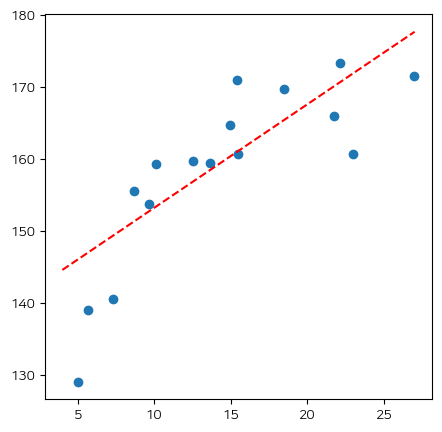

In [82]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화
plt.figure(figsize = (5,5))
plt.scatter(age_height["age(X)"], age_height["height(T)"])
xx = np.arange(age_height["age(X)"].min()-1, age_height["age(X)"].max()+1)
yy = reg.predict(xx.reshape(-1,1))
plt.plot(xx,yy, ls = "--", c = "red")

#y = 0.697056X + 36.06 시각화



# < 스탯츠모델에서 단순선형회귀 수행>

In [122]:
#스탯츠모델 import
import statsmodels.api as sm

beer = pd.read_csv("data/02ml2/beer.csv")
X = np.array(beer["temperature"]).reshape(-1,1) #행은 몇개인지 모르겠지만 열은 하나야
y = np.array(beer["beer"])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

#intercept를 직접 프로그래머가 더해주어야 함
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
# 행렬 방정식으로 푼다 하면 

lr = sm.OLS(y_train, X_train) # 순서 사이킷런이랑 다름  유의할 것 
reg = lr.fit()
print(reg.summary())

# 맥주 데이터 
# 데이터 생성


#독립변수, 종속변수 데이터셋 준비



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.63
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           9.50e-05
Time:                        14:20:08   Log-Likelihood:                -79.854
No. Observations:                  24   AIC:                             163.7
Df Residuals:                      22   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0667      3.315     10.881      0.0

In [ ]:
# 스탯츠모델


In [ ]:
# 성능 평가


# 응용2: 농어 무게 예측

In [85]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
perch_df = pd.DataFrame({"perch_length": perch_length, "perch_weight": perch_weight})
perch_df

Text(0, 0.5, 'perch_weight')

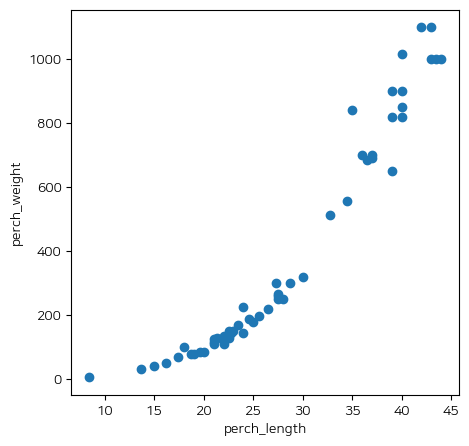

In [93]:
plt.figure(figsize=(5,5))
plt.scatter(perch_length, perch_weight)
plt.xlabel("perch_length")
plt.ylabel("perch_weight")

In [156]:
# 농어 무게의 예측이니까 length이 독립, weight 이 종속(문제에서 무게를 물었으니까!)
from sklearn.model_selection import train_test_split

X = perch_length.reshape((-1,1))
y = perch_weight

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# X_train, X_test, y_train, y_test

In [157]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#mae
mae = mean_absolute_error(y_test, y_pred)
#mse
mse = mean_squared_error(y_test, y_pred)
#rmse
rmse = np.sqrt(mse)
#r2score
r2 = r2_score(y_test, y_pred)

coef = reg.coef_
intercept = reg.intercept_
print(f"mae: {mae}")
print(f"mse: {mse}")
print(f"rmse: {rmse}")
print(f"r2: {r2}")
print(f"coef: {coef}")
print(f"intercept: {intercept}")

mae: 104.27090497539177
mse: 14550.237015602397
rmse: 120.6243632754279
r2: 0.880333023666755
coef: [35.63110638]
intercept: -618.3317511711567


In [159]:

# xx = [5,50]
# y1 = 5*reg.coef_[0] + reg.intercept_
# y1 = 50*reg.coef_[0] + reg.intercept_
# 이렇게 해도 됨



xx = np.arange(perch_df["perch_length"].min()-1, perch_df["perch_length"].max()+1)
yy = reg.predict(xx.reshape(-1,1))

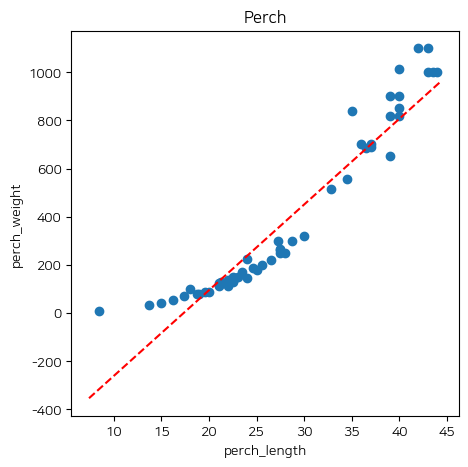

In [162]:
#시각화 
import matplotlib as mpl
mpl.rc('axes', unicode_minus=False)
plt.figure(figsize=(5,5))
plt.scatter(perch_df["perch_length"],perch_df["perch_weight"])
plt.plot(xx,yy, ls = "--", c = "red")
plt.xlabel("perch_length")
plt.ylabel("perch_weight")
plt.title("Perch")
plt.show();

# 응용3: 보스턴 집값 선형 회귀

### 데이터 수집

In [129]:
# from sklearn.datasets import load_boston #버전 1.13이상이면 다 에러남 윤리적이지 못하다 그래서 없어짐 
#boston = load_boston()

from sklearn import datasets 
boston = datasets.fetch_openml('boston') #그래서 이렇게 가져옴
#zone 0 ~ 506  지역별로 다 조사를 해서 요소를 조사를 했고, 그 지역의 집값의 중앙값을 종속으로 둠 (나머지 독립)


/Users/minholee/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/minholee/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### 데이터 탐색

In [130]:
dir(boston)
#target : 종속변수
#target_names: 종속변수 속성

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [131]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [132]:
print(boston.data[:5])

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [133]:
print(boston.target[:5])

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [135]:
print(boston.feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [ ]:
#독립변수가 13개라 많아서 그림 많이 그려볼 수 있음 

### 데이터 준비

In [166]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환
# 특성 하나만 고를건데 그 중 RM(거주할 수 있는 방의 개수, 독립변수), price를 종속
import pandas as pd

X = boston.data.RM
y = boston.target
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

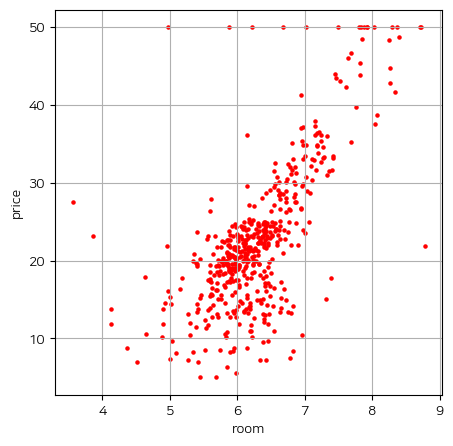

In [167]:
#데이터 탐색
plt.figure(figsize=(5,5))
plt.scatter(X, y, s = 5, c = 'red')
plt.xlabel("room")
plt.ylabel("price")
plt.grid()


### 학습용/ 검증용 데이터 분리

In [168]:
# 조건 : 학습 7, 검증 3
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라
from sklearn.model_selection import train_test_split

X = np.array(X).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1)



In [169]:
y_train

13     20.4
61     16.0
377    13.3
39     30.8
365    27.5
       ... 
255    20.9
72     22.8
396    12.5
235    24.0
37     21.0
Name: MEDV, Length: 354, dtype: float64

### 모델 구축

In [170]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

reg = lr.fit(X_train, y_train)
y_pred = reg.predict(X_test)

### 모델 평가

In [171]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#mae
mae = mean_absolute_error(y_test, y_pred)
#mse
mse = mean_squared_error(y_test, y_pred)
#rmse
rmse = np.sqrt(mse)
#r2score
r2 = r2_score(y_test, y_pred)

coef = reg.coef_
intercept = reg.intercept_
print(f"mae: {mae}")
print(f"mse: {mse}")
print(f"rmse: {rmse}")
print(f"r2: {r2}")
print(f"coef: {coef}")
print(f"intercept: {intercept}")

mae: 4.455731210109733
mse: 36.517214730838624
rmse: 6.042947520112898
r2: 0.6015774471545623
coef: [8.46109164]
intercept: -30.571032410898336


### 시각화

Text(0, 0.5, 'price')

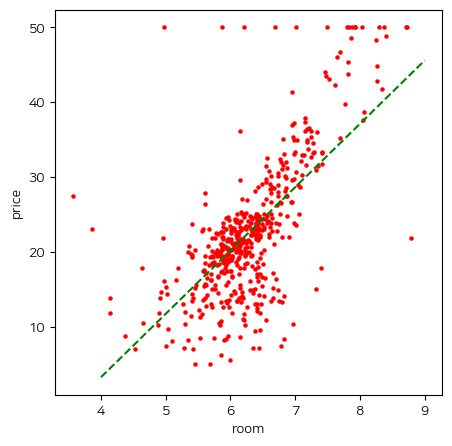

In [175]:
plt.figure(figsize=(5,5))
plt.scatter(X, y, s = 5, c = 'red')
# xx = np.arange(boston.data.RM.min()-1,boston.data.RM.max()+1)
xx = np.linspace(4,9)#앞 숫자와 뒷 숫자 사이를 동일한 공간으로 나눠줌 default = 100
yy = reg.predict(xx.reshape(-1,1))
plt.plot(xx,yy, ls = "--", c = "green")
plt.xlabel("room")
plt.ylabel("price")
#plt.grid()
# 너무 황당한 값들 -> outlier,이상치라 부름 
# 이상치에 따라 성능이 많이 달라짐 

# 다중선형회귀


In [176]:
from sklearn import datasets 
boston = datasets.fetch_openml('boston') #그래서 이렇게 가져옴

/Users/minholee/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/minholee/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [177]:
boston.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [178]:
boston.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

#  다중선형회귀

# 보스톤 집값 데이터셋을 이용한 다중선형회귀 모델 구축 및 평가

## 필요한 모듈


In [179]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn import datasets

####  데이터 수집

In [181]:
#데이터셋을 로드

from sklearn import datasets 
boston = datasets.fetch_openml('boston')

/Users/minholee/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/minholee/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


####  데이터 이해

In [183]:
type(boston.data)

pandas.core.frame.DataFrame

In [189]:
dir(boston)
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [187]:
boston_df = boston.data

In [ ]:
#데이터셋 정보확인

In [188]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


![image.png](./images/boston_features.png)

In [ ]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환

In [ ]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# boston_df생성
# boston_df.head() 데이터 5개 확인



In [190]:
# 데이터셋 객체의 target배열(boston.target)을 종속 변수인 주택 가격("PRICE") 컬럼으로 추가
boston_df["PRICE"] = boston.target

In [191]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [192]:
#데이터의 크기와 형태를 확인
boston_df.info() # 빈 데이터가 없음을 확인 RAD: 고속도로와 얼마나 붙어있는가 
# 회귀는 실수값이 되어 영향을 미침 -> 카테고리는 회귀에서 제외

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [ ]:
# 데이터프레임 정보


#### 데이터 이해:  데이터 선정 및 분포 정보 확인

In [193]:
# CHAS : 찰스강변 데이터 - 연속형 값이 아닌 카테고리형 , 분석 대상에 제외한다.
boston_df.drop(['CHAS'], axis = 1, inplace=True)
boston_df.drop(['RAD'], axis = 1, inplace=True)

In [194]:
# CHAS 컬럼 확인
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  PRICE    506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


In [195]:
# 독립변수 11개와 종속변수 PRICE 하나 
# Y축은 종속변수로 두고 각 독립변수간의 관계를 산점도로 그려본다 


In [196]:
# 독립변수와  종속변수와의 관계에 대한 산점도 시각화
# subplot으로 만들 수 있음 
boston_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [197]:
# 칼럼을 순회하며 데이터 프레임 열을 가져오면 되겠지 
#f_features = [f for f in list(boston_df.columns)[:-1] if f !="CHAS" ] #마지막 칼럼인 PRICE를 -1로 제거
boston_df.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

In [198]:
for f in boston_df.columns[:-1]:
    print(f)
print("대충 이런 원리임")

CRIM
ZN
INDUS
NOX
RM
AGE
DIS
TAX
PTRATIO
B
LSTAT
대충 이런 원리임


In [199]:
f_features = [f for f in boston_df.columns[:-1] if f != "CHAS"]

In [ ]:
#각각의 

### 컬럼 별로 독립변수간의 상관관계 시각화(다중공선성이 의심되는 독립변수들)
#### pairplot(): 수치형 변수에 적용 가능

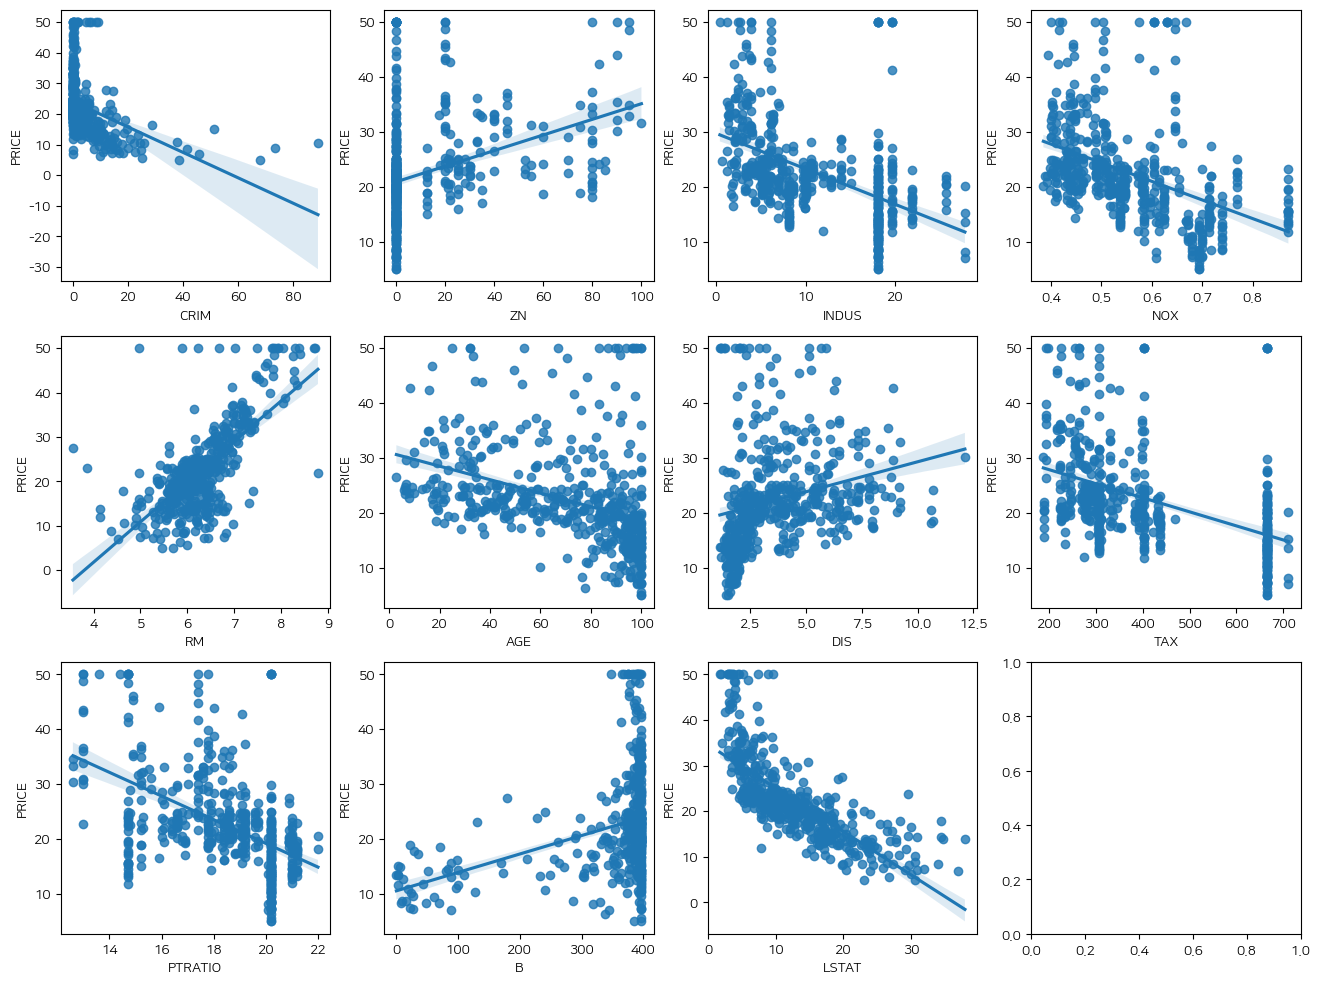

In [201]:
# 각각의 독립변수와 종송변수 간의 관계를 시각화하여 subplot으로 그림 

import matplotlib.pyplot as plt
import seaborn as sns

# subplot캔버스를 준비한다 
fix, ax = plt.subplots(figsize = (16, 12),nrows=3, ncols=4)

for i, feature in enumerate(boston_df.columns[:-1]): #리턴 값으로 인덱스와 아이템을 차례로 출력하는 효과가 있다 
    # print(i, feature)
    row = int(i/4)## 몫
    col = i%4 # 나머지 
    sns.regplot(x=feature, y = "PRICE", data = boston_df, ax = ax[row][col])
# 파이썬에선 좌표로 알려줘야함 
# ax[0][0] 좌상단이 0 


In [ ]:
# EDA는 이러한 데이터 중 어떠한 것을 선택하는 feature selection 과정이 포함됨

# EDA 방법 중 독립 변수와 종속 변수의 시각화를 통해 관계를 알아봄 

In [ ]:


# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다


# 변수 간의 상관 계수를 구한다

#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션



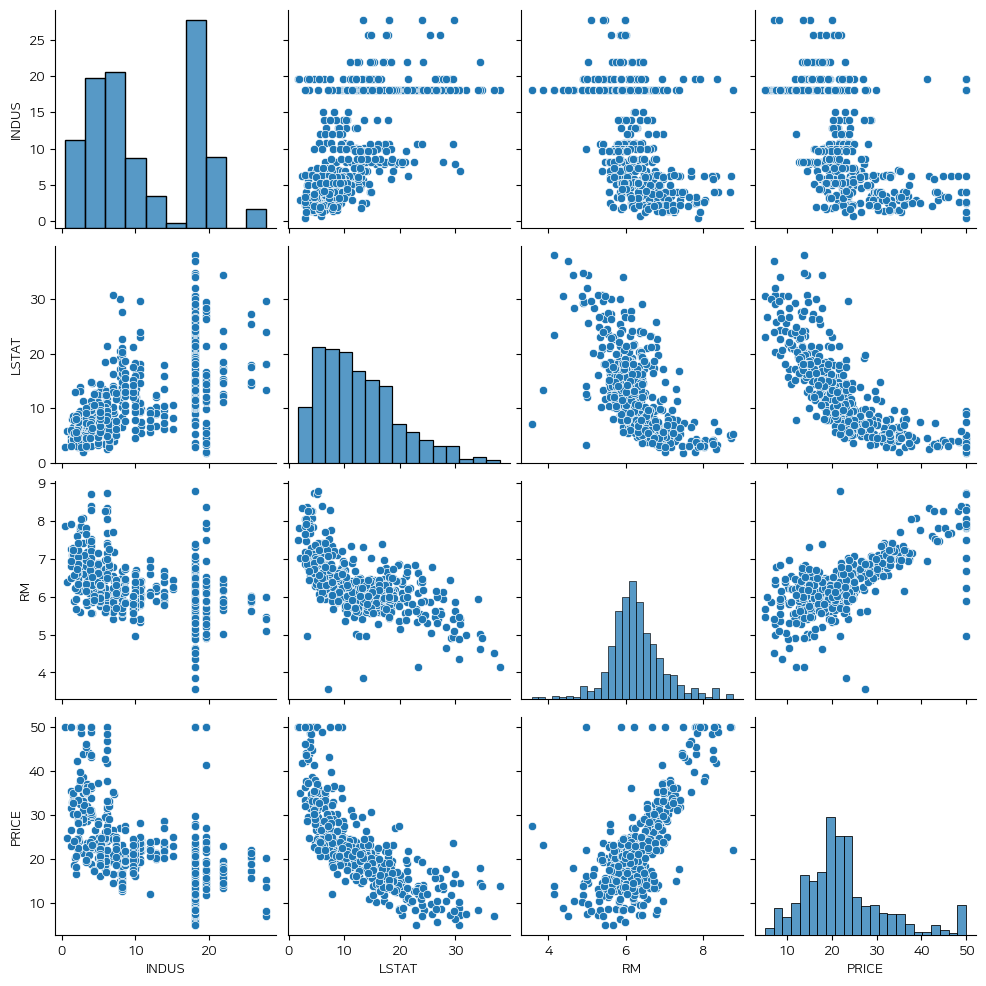

In [202]:
#pairplot(): 수치형 변수에 적용 가능 
features = boston_df.columns[:-1]
features = ["INDUS", "LSTAT", "RM", "PRICE" ]
sns.pairplot(boston_df[features]) # 쌍으로 그리기! 
# (n,n)은 같은 변수, 즉 일변수이기 때문에 barplot으로 나타나게 됨

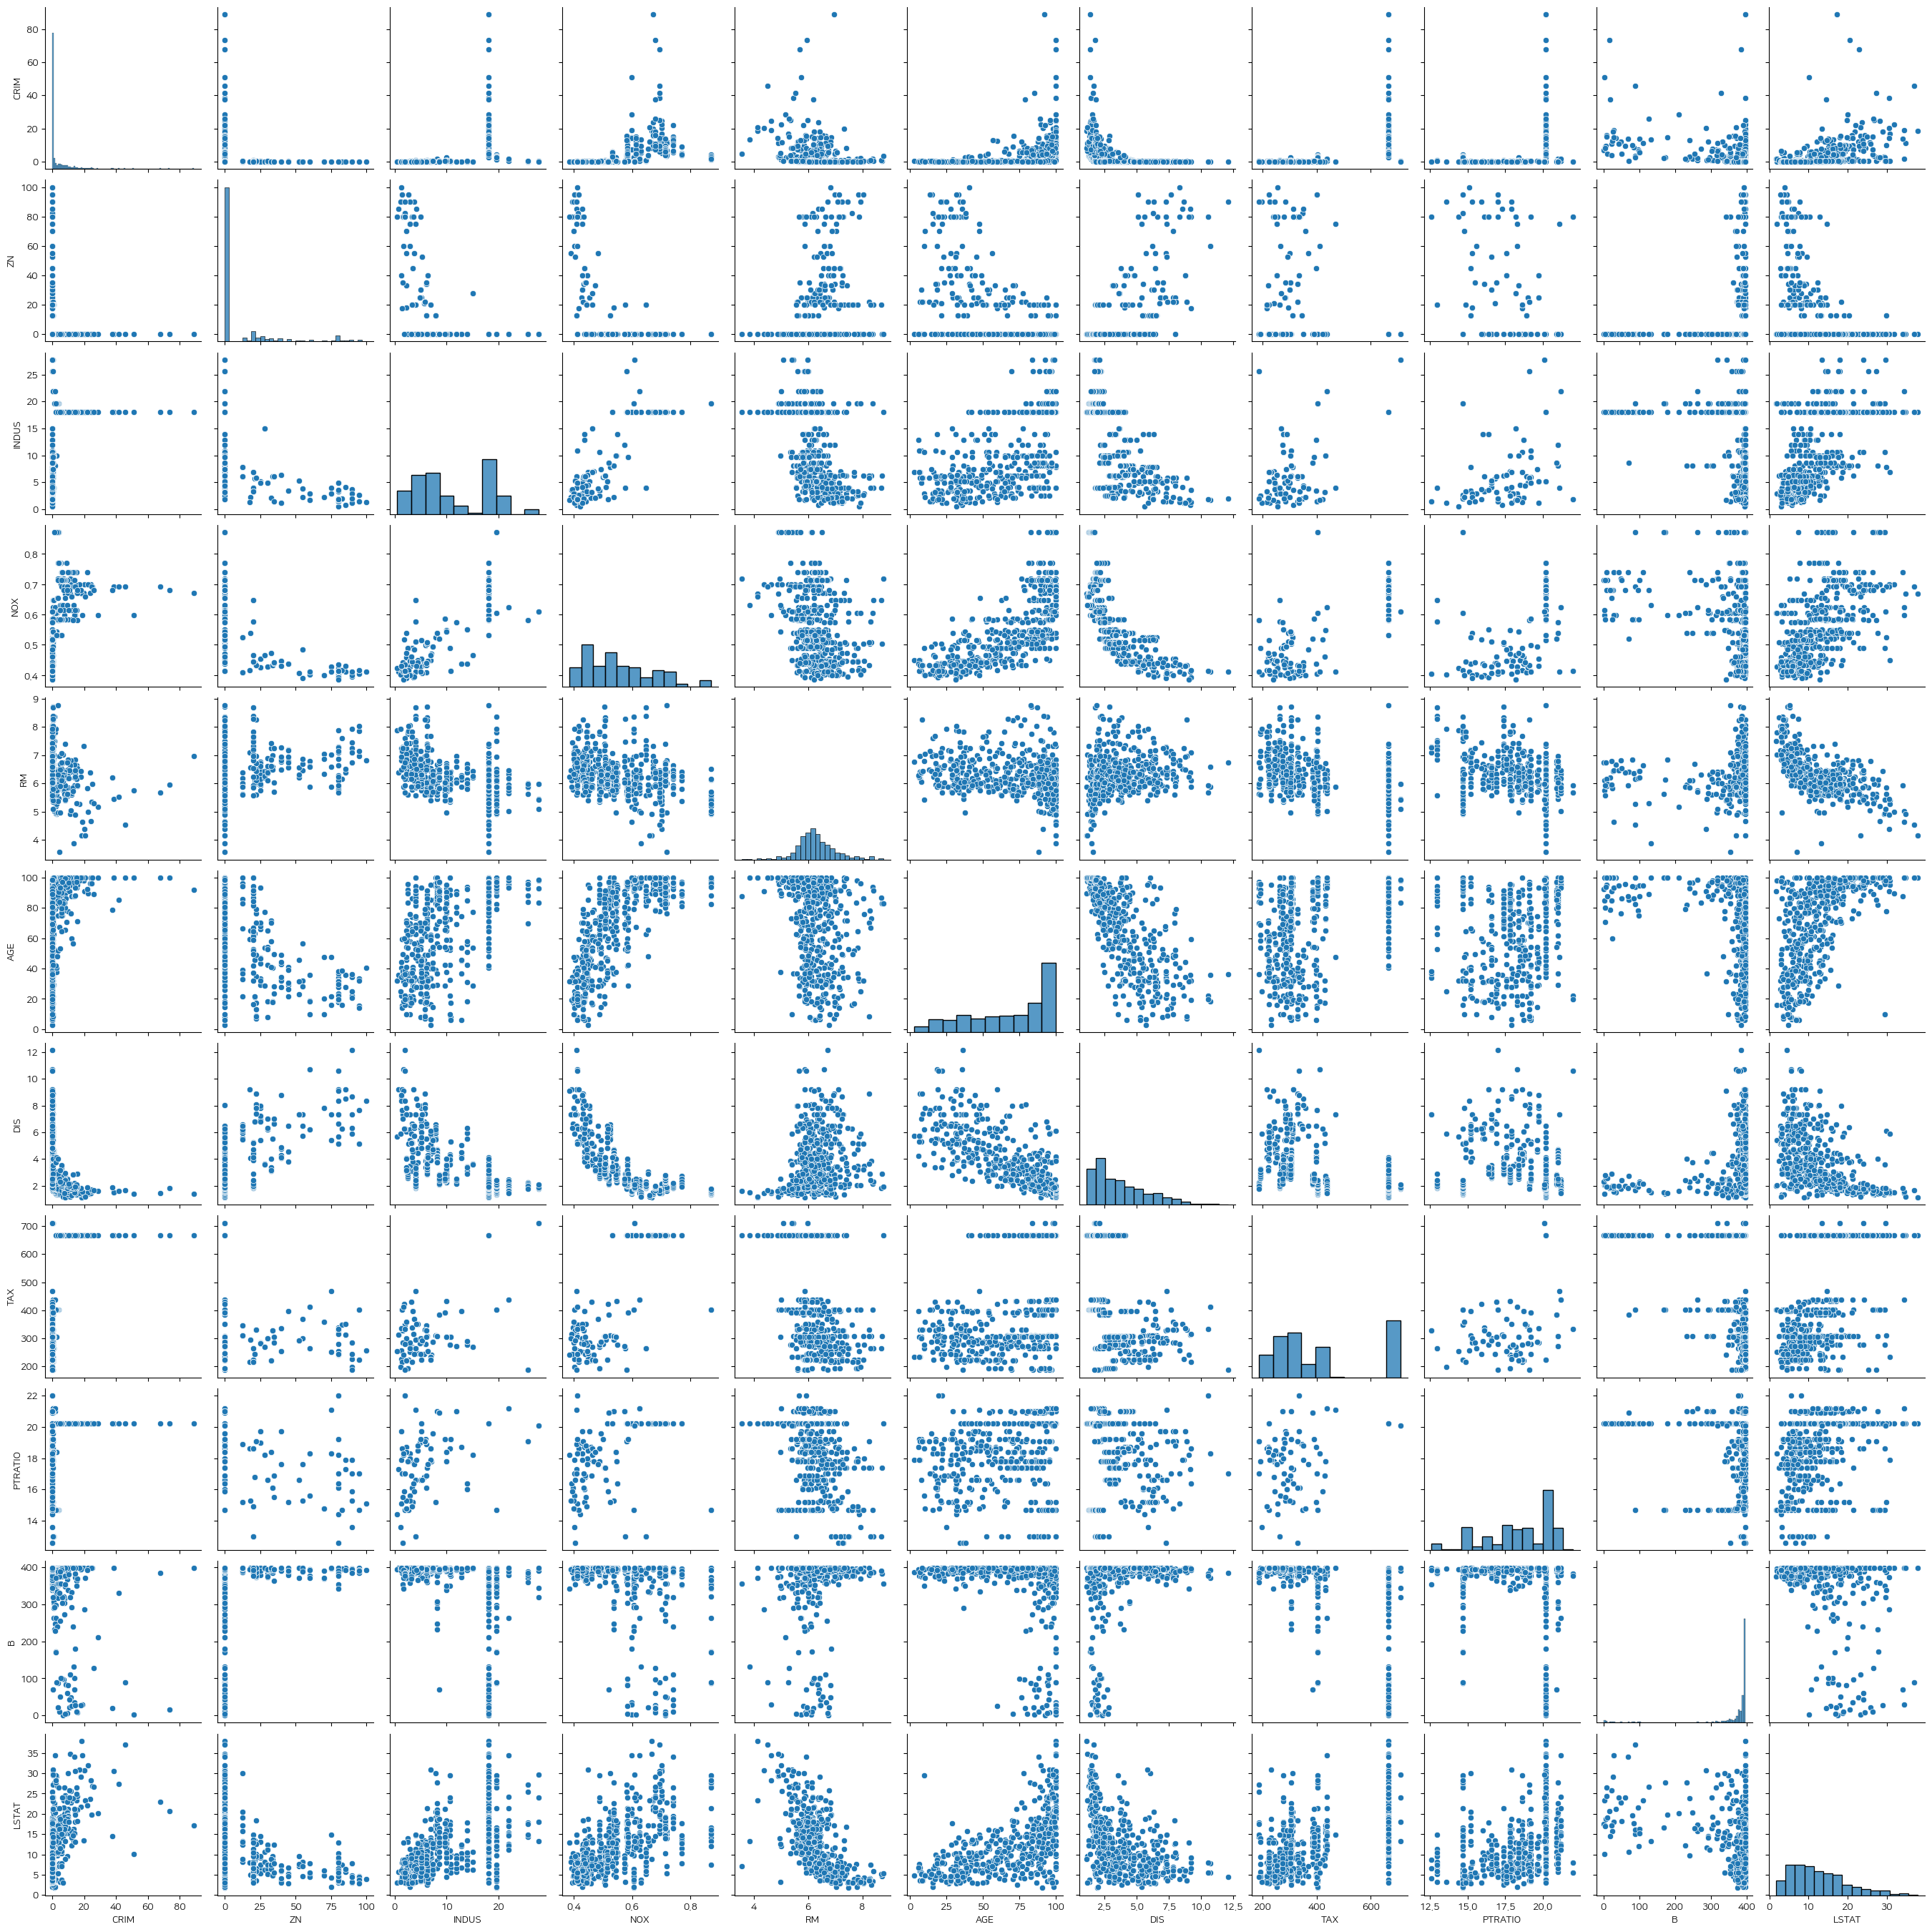

In [203]:
#pairplot(): 수치형 변수에 적용 가능, 쌍으로 그리기, 독립변수 간의 고나계를 시각화 
features = boston_df.columns[:-1]
sns.pairplot(boston_df[features]) # 쌍으로 그리기! 
# (n,n)은 같은 변수, 즉 일변수이기 때문에 barplot으로 나타나게 됨

<AxesSubplot: >

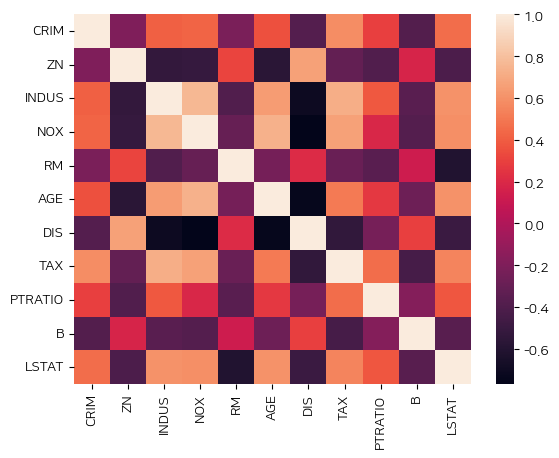

In [205]:
# 컬럼 별로 독립변수간의 상관관계 히트맵 시각화
# heatmap()
#독립변수간의 상관관계가 있을 수 있잖아?
#
corr_df = boston_df[features].corr()#모든 컬럼에 대해서 corr즉 상관관계를 가져옴
sns.heatmap(corr_df)
#이것만으로는 보기 어렵잖?



<AxesSubplot: >

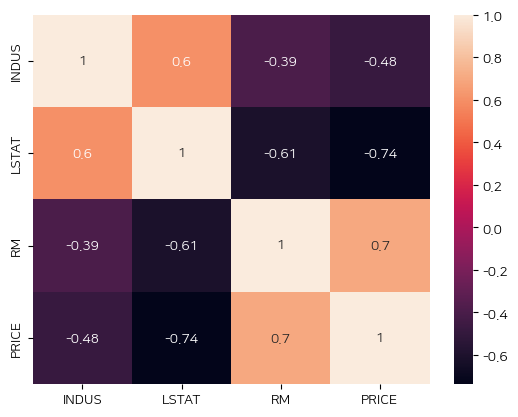

In [207]:
features = ["INDUS", "LSTAT", "RM", "PRICE"]
corr_df = boston_df[features].corr()#모든 컬럼에 대해서 corr즉 상관관계를 가져옴
sns.heatmap(corr_df, annot=True)

# 보스턴 집값 다중선형회귀 분석(사이킷런)

In [212]:
# 데이터 준비, 탐색은 위에서 수행한 것으로 대체
boston_df
#sklearn은 x,y를 분리해야 함
X = boston_df.drop(['PRICE'], axis = 1) # drop 을 쓰거나 
# or
X = boston_df[boston_df.columns[:-1]] # 슬라이싱을 하거나 
y = boston_df["PRICE"]
# 데이터가 준비되었다 !

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


### 데이터 준비

#### 데이터 분할

In [214]:
from sklearn.model_selection import train_test_split
# X(독립변수), Y(종속변수) 분할

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# 학습용 데이터와 평가용 데이터로 분할하기


In [215]:
#X_train 데이터 일부 확인
X_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.547,6.176,72.5,2.7301,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.448,5.682,33.8,5.1004,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.538,5.935,29.3,4.4986,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.580,5.926,71.0,2.9084,666.0,20.2,368.74,18.13


### 모델 클래스 선택

In [ ]:
from sklearn.linear_model import LinearRegression


### 모델 구축 

In [ ]:
#학습 수행




### 모델 평가

In [ ]:


# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기


# 평가 지표 계산


In [ ]:
# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기


#독립변수의 갯수


# 수정된 결정 계수


![image.png](./images/adjusted_r2.png)

#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [ ]:
# 회귀 계수 확인: 각각의 독립변수의 설명력 확인

# ndarray의 실수를 부동 소수점으로 출력

# 회귀 계수와 절편 값 확인

# ndarray의 실수 출력 옵션 복구


In [ ]:
# 본래의 출력 옵션


In [ ]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
#회귀 계수값을 기준으로 내림차순으로 정렬



In [ ]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦


###  실제값과 예측값의 분포차이를 시각화

# 보스턴 집값: 다중선형회귀 분석(스탯츠모델)

In [ ]:
# 최소 제곱법으로 객체 생성, 학습, 예측, 평가를 진행한다.



# 훈련 데이터로 학습 수행

# 검증 데이터로 예측 수행

#평가 지표 값 확인


# [응용1] 다중 선형회귀 연습 - load_diabetes

### 필요한 모듈 import

### 데이터 수집

### 데이터 이해

### 데이터 준비

### 모델 구축

### 모델 평가

#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

###  실제값과 예측값의 분포차이를 시각화

# [응용2] 캘리포니아 주택 가격

<img src='./images/cali_house_features.png' width="450" height="450"/>

### 데이터 수집 및 탐색

In [ ]:
#fetch data이므로 온라인으로만 fetch가능
# 온라인 아닌경우 :  pd.read_csv('./data/california_dataset.csv')


In [ ]:
# 샘플:20640

In [ ]:
#속성 :8개

### 시각화로 탐색

In [ ]:
#데이터프레임으로 변환

# 기초 통계량 확인


In [ ]:
# 종속(price)변수 VS 독립변수(8개)  관계 시각화 탐색


In [ ]:
# 독립변수 간 상관관계 확인

In [ ]:


# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다

#pairplot 시각화


In [ ]:
# 위경도 데이터 시각화

# 위경도 정보에 따라 블록별로 산점도를 그리되 거주 인구수에 비례하게 점의 크기를 정하고, 주택 가격에 따라 점의 색깔을 다르게 한다


In [ ]:
# 상관 계수 히트맵

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다


# 변수 간의 상관 계수를 구한다

#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션


In [ ]:
# 선형회귀 모델 구축

# 회귀식으로 표현


# 결과 시각화 ( actual price VS predicted price)

In [ ]:


# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기


# 평가 지표 계산


# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기


#독립변수의 갯수

# 수정된 결정 계수


# [도전] 펭귄 몸무게 예측(dacon)

# [도전] 자전거 대여 수요 예측(Kaggle)

- datetime: hourly date + timestamp
- season: 1=봄, 2=여름, 3=가을, 4=겨울
- holiday: 1=토, 일요일의 주말을 제외한 국경일 등의 휴일, 0= 휴일이 아닌 날
- workingday: 1=토, 일요일의 주말 및 휴일이 아닌 주중, 0=주말 및 휴일
- weather:
* 1 : 맑음, 약간 구름 낀 흐림
* 2 : 안개, 안개  + 흐림
* 3 : 가벼운 눈, 가벼운 비 + 천둥
* 4 : 심한 눈/비, 천둥/번개

- temp: 온도(섭씨)
- atemp: 체감온도
- humidity: 상대 습도
- windspeed: 풍속
- casual: 사전에 등록되지 않은 사용자가 대여한 횟수
- registered: 사전에 등록한 사용자가 대여한 횟수
- count: 대여 횟수

------------------------------------------------------------------------------

## 회귀 트리를 이용한 예측은 추후 추가
- RandomForestRegressor
- GradientBoostRegressor
- XGBRegressor
- LGBMRegressor